# Remote Work & Mental Health EDA

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={"figure.figsize":(20, 7)})


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/remote-work-and-mental-health/Impact_of_Remote_Work_on_Mental_Health.csv


In [2]:
df = pd.read_csv('/kaggle/input/remote-work-and-mental-health/Impact_of_Remote_Work_on_Mental_Health.csv')

In [3]:
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [4]:
df.shape

(5000, 20)

In [5]:
df.isna().sum()

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64

Wow, we have a lot of date (5000 entries, 20 columns each). A huge portion of data in cols `Mental_Health_Condition` and `Physical_Activity` is missing, we'll have to deal with it later.

In [6]:
df.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


## `Age`

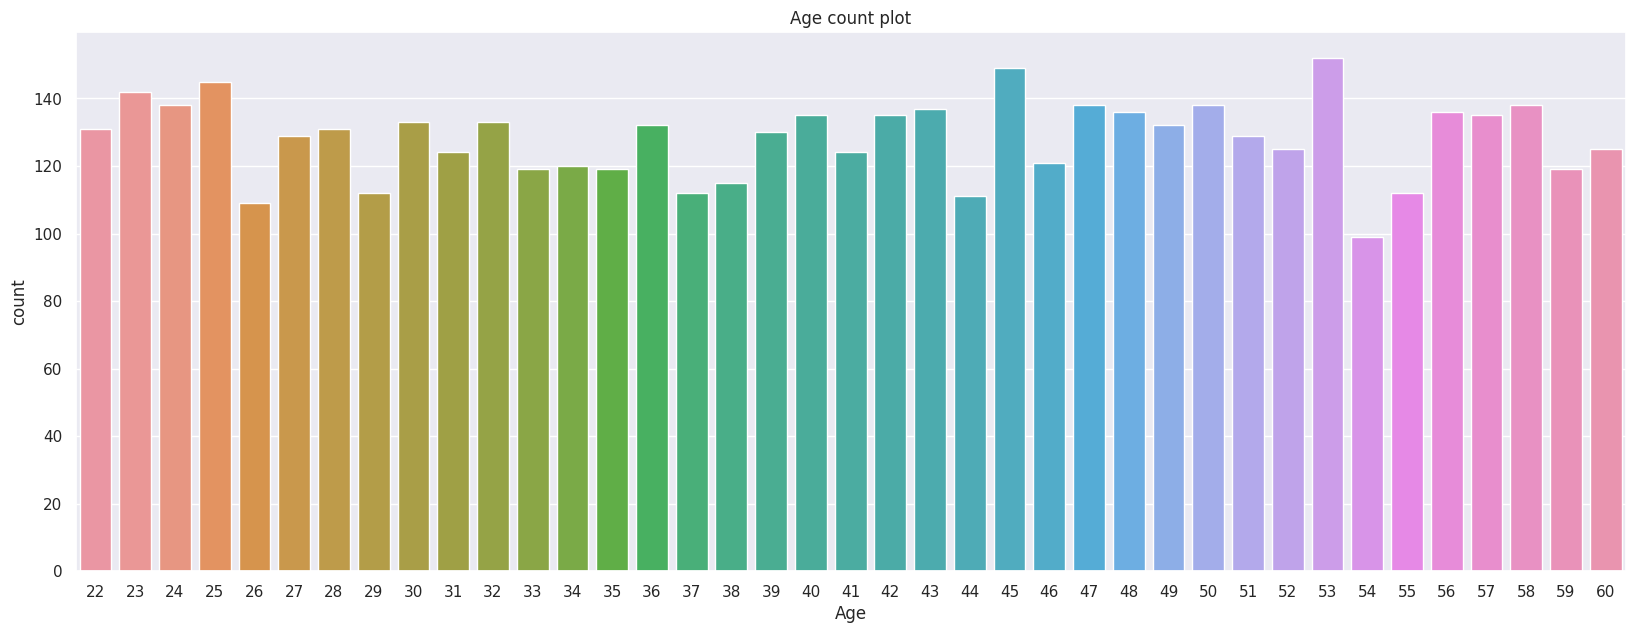

In [7]:
sns.countplot(df, x='Age').set(title='Age count plot');

### `Gender`

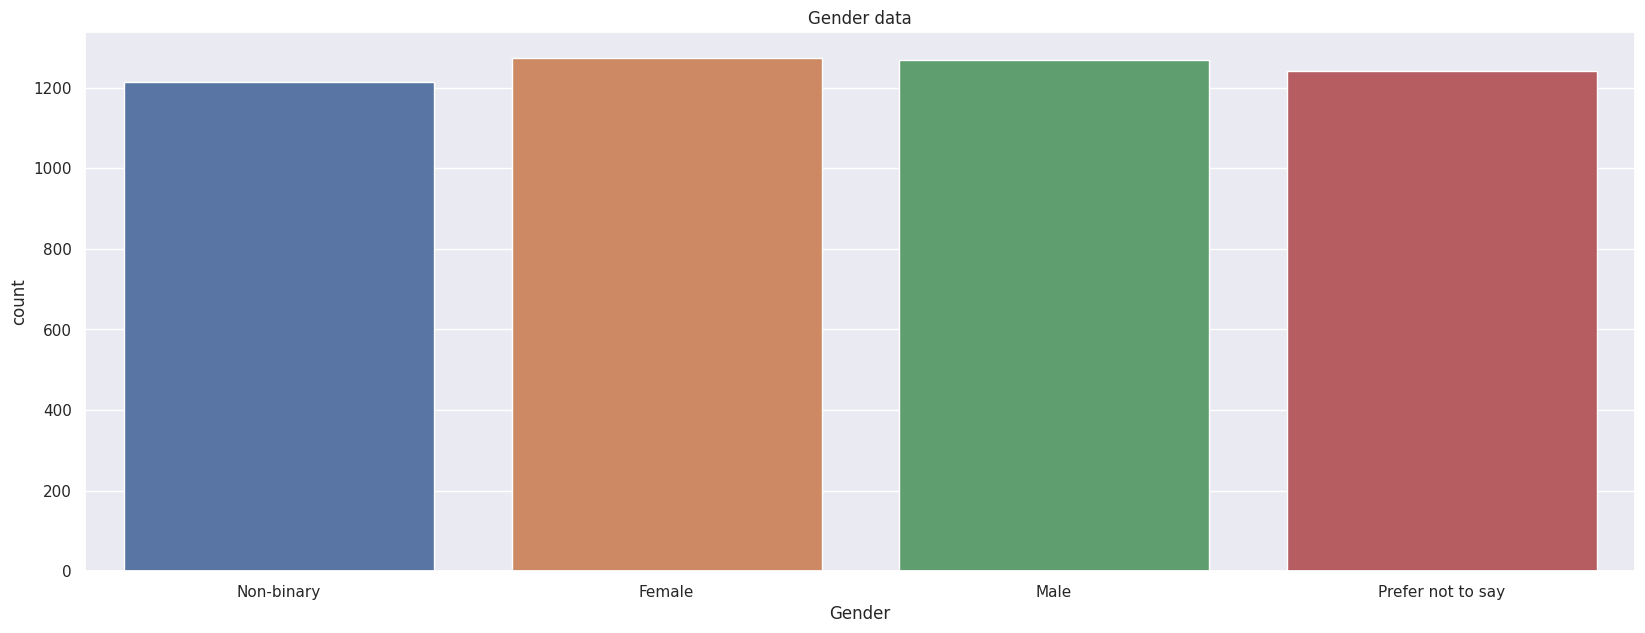

In [8]:
sns.countplot(df, x='Gender').set(title='Gender data');

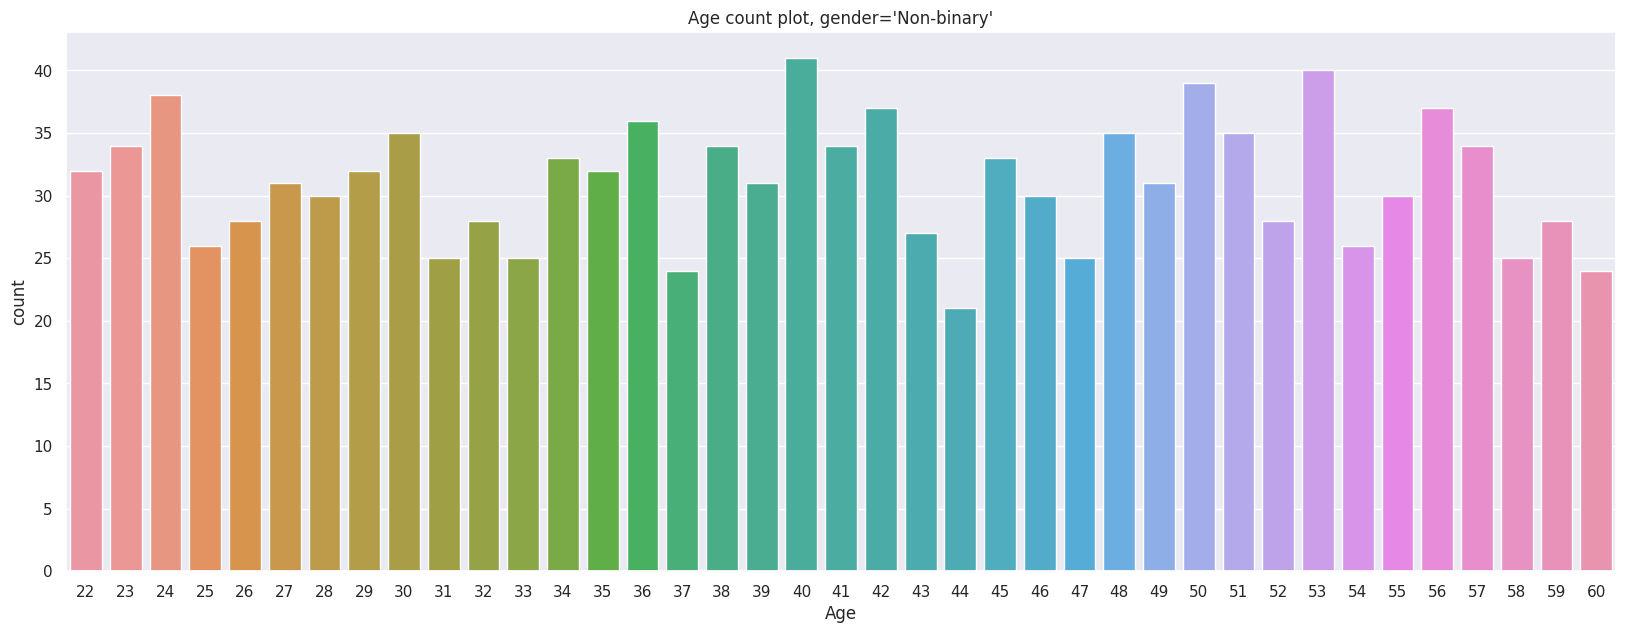

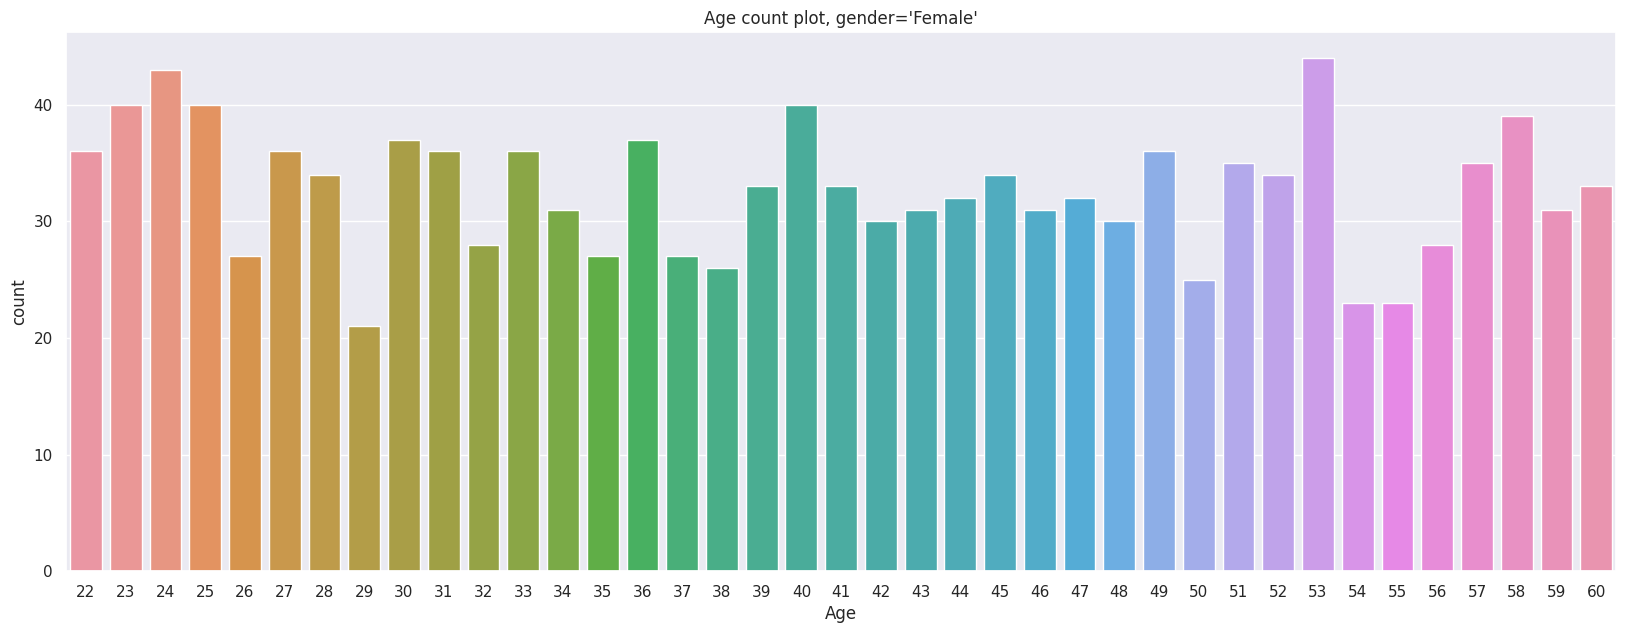

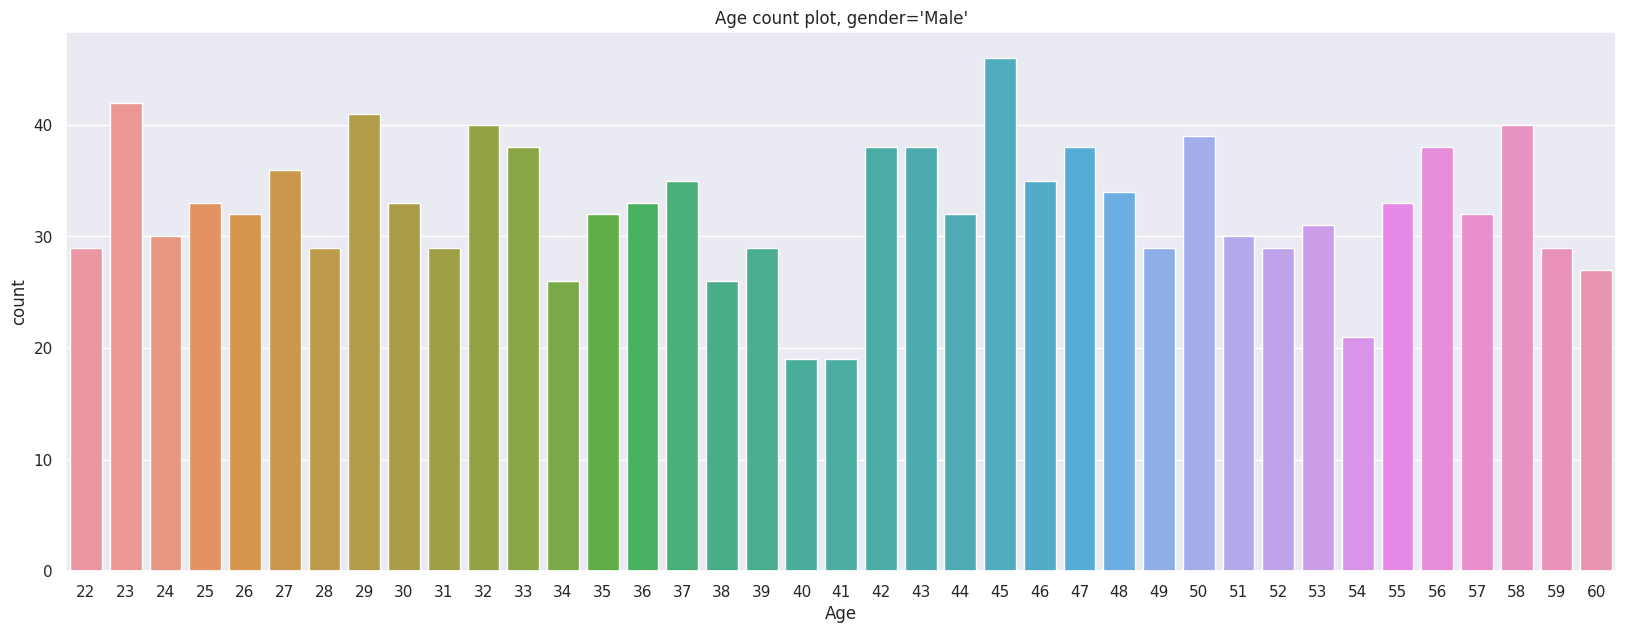

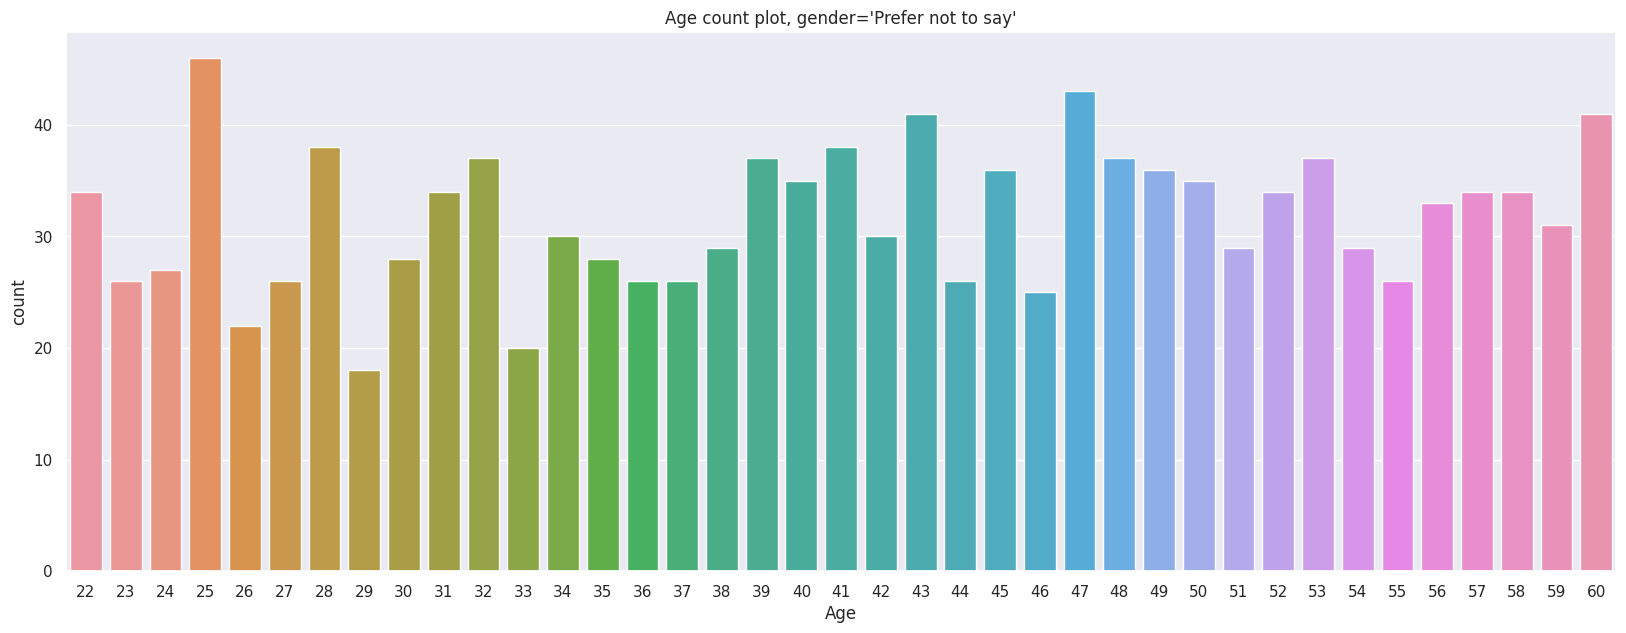

In [9]:
for gender in df.Gender.unique():
    sns.countplot(df[df['Gender'] == gender], x='Age').set(title=f'Age count plot, {gender=}');
    plt.show()

## `Job_Role`

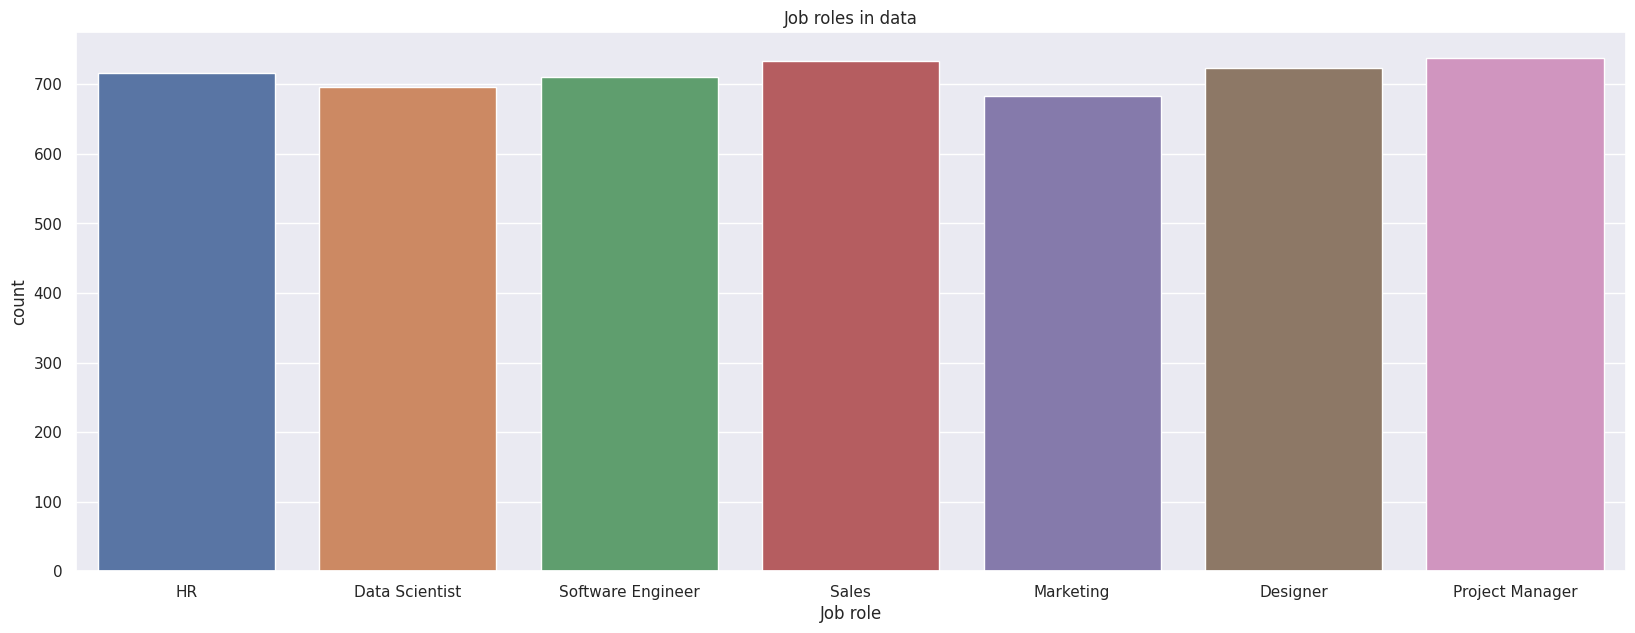

In [10]:
sns.countplot(df, x='Job_Role').set(title='Job roles in data', xlabel='Job role');

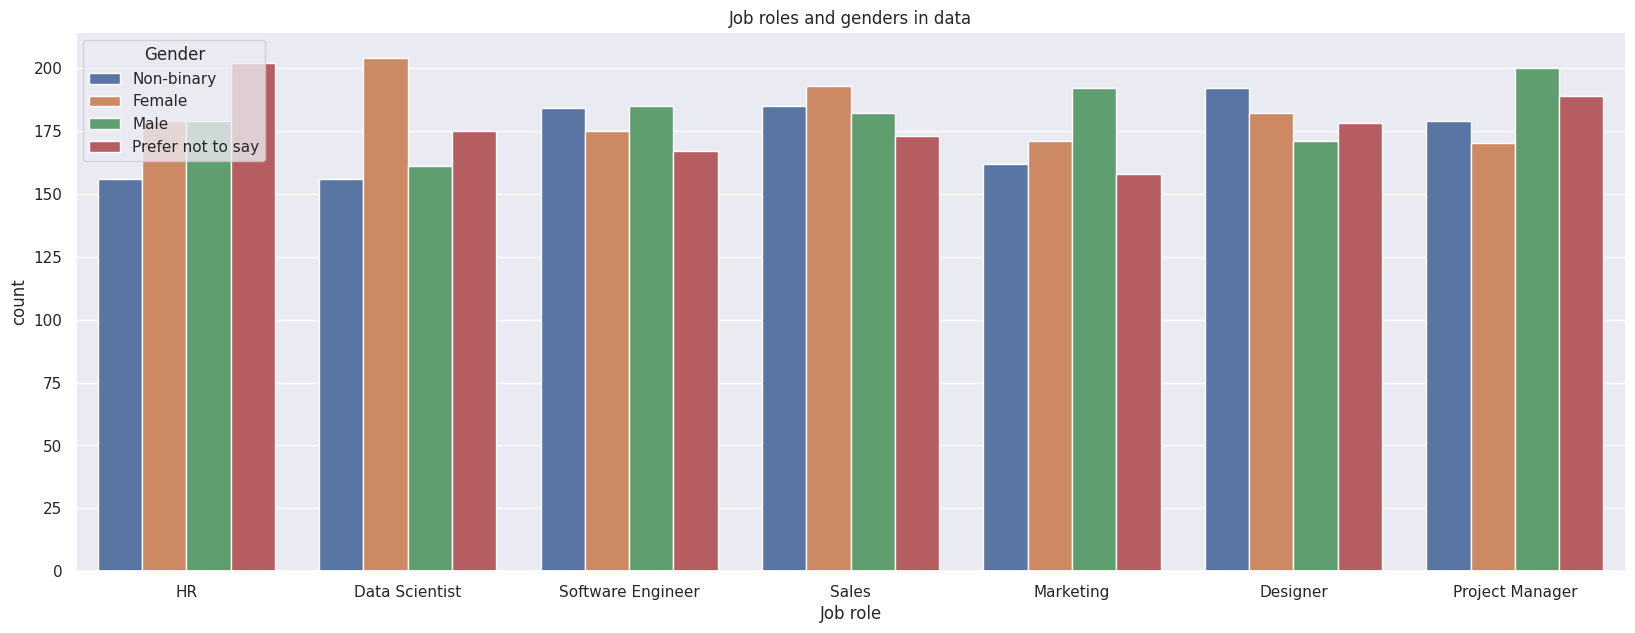

In [11]:
sns.countplot(df, x='Job_Role', hue='Gender').set(title='Job roles and genders in data', xlabel='Job role');

## `Years_of_Experience`

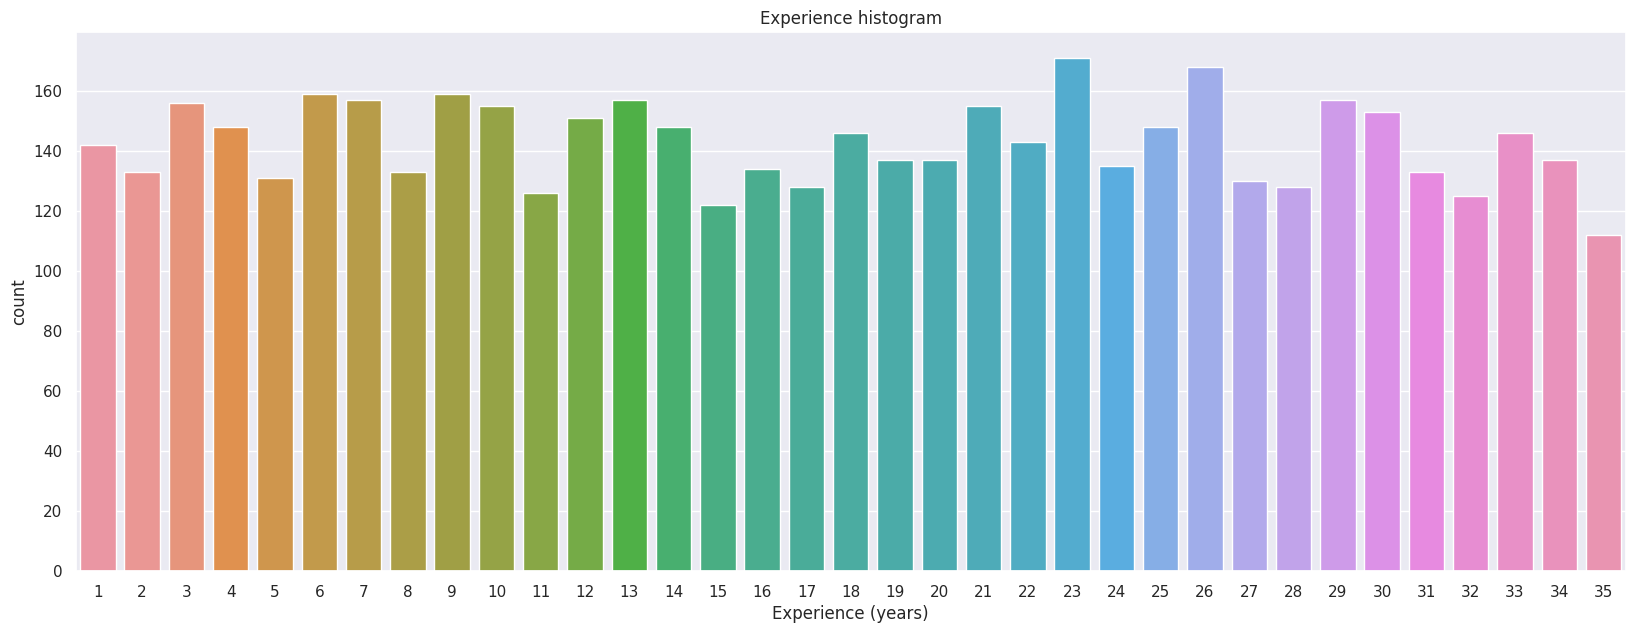

In [12]:
sns.countplot(df, x='Years_of_Experience').set(title='Experience histogram', xlabel='Experience (years)');

In [13]:
df[['Age', 'Years_of_Experience']].corr()

,Age,Years_of_Experience
Age,1.00000,-0.00448
Years_of_Experience,-0.00448,1.00000


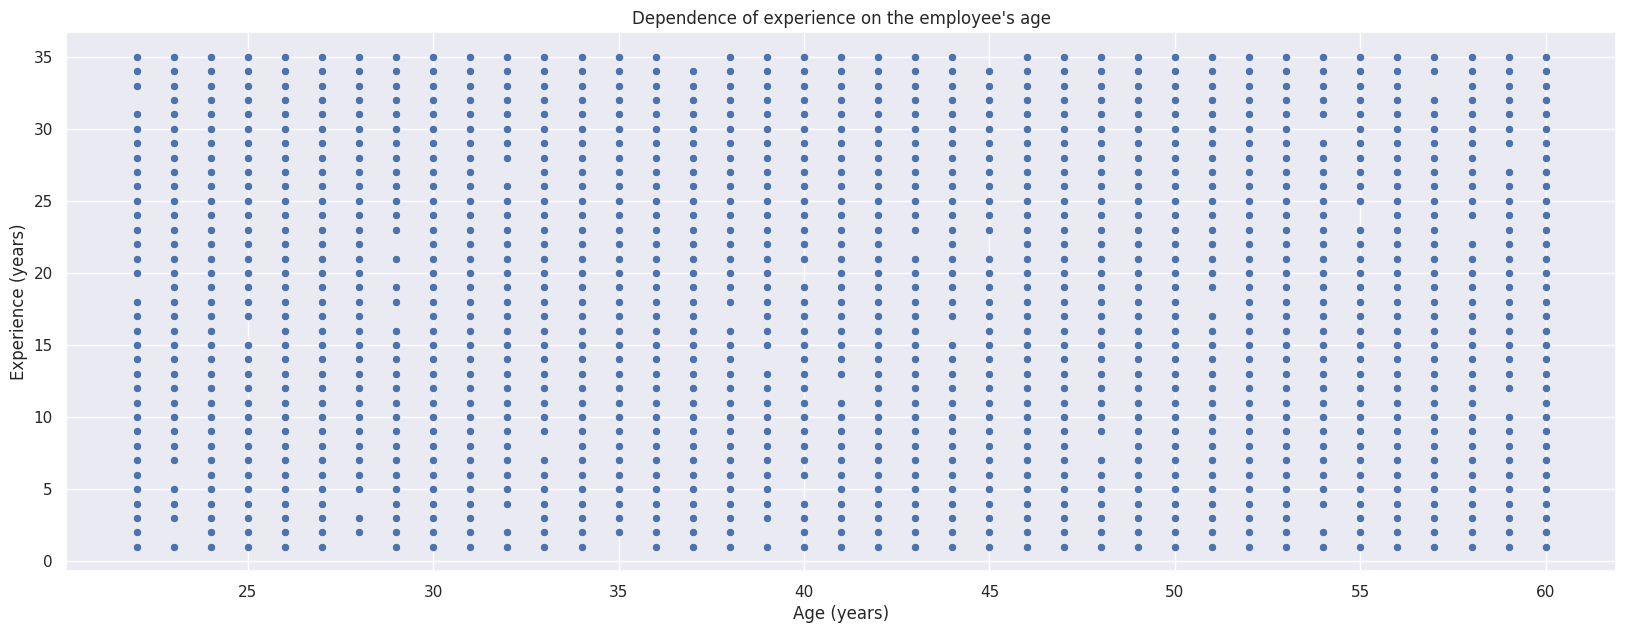

In [14]:
sns.scatterplot(df, x='Age', y='Years_of_Experience').set(title='Dependence of experience on the employee\'s age', xlabel='Age (years)', ylabel='Experience (years)');

## `Work_Location`

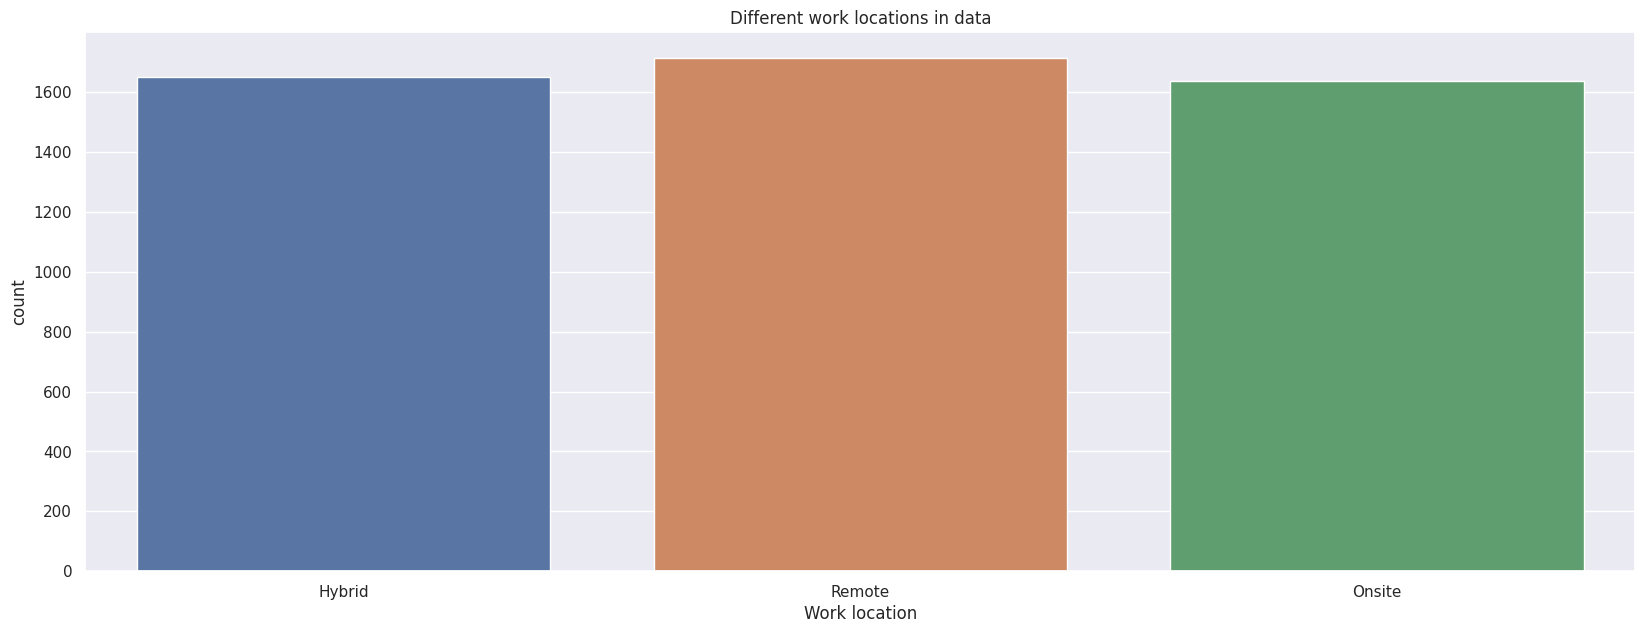

In [15]:
sns.countplot(df, x='Work_Location').set(title='Different work locations in data', xlabel='Work location');

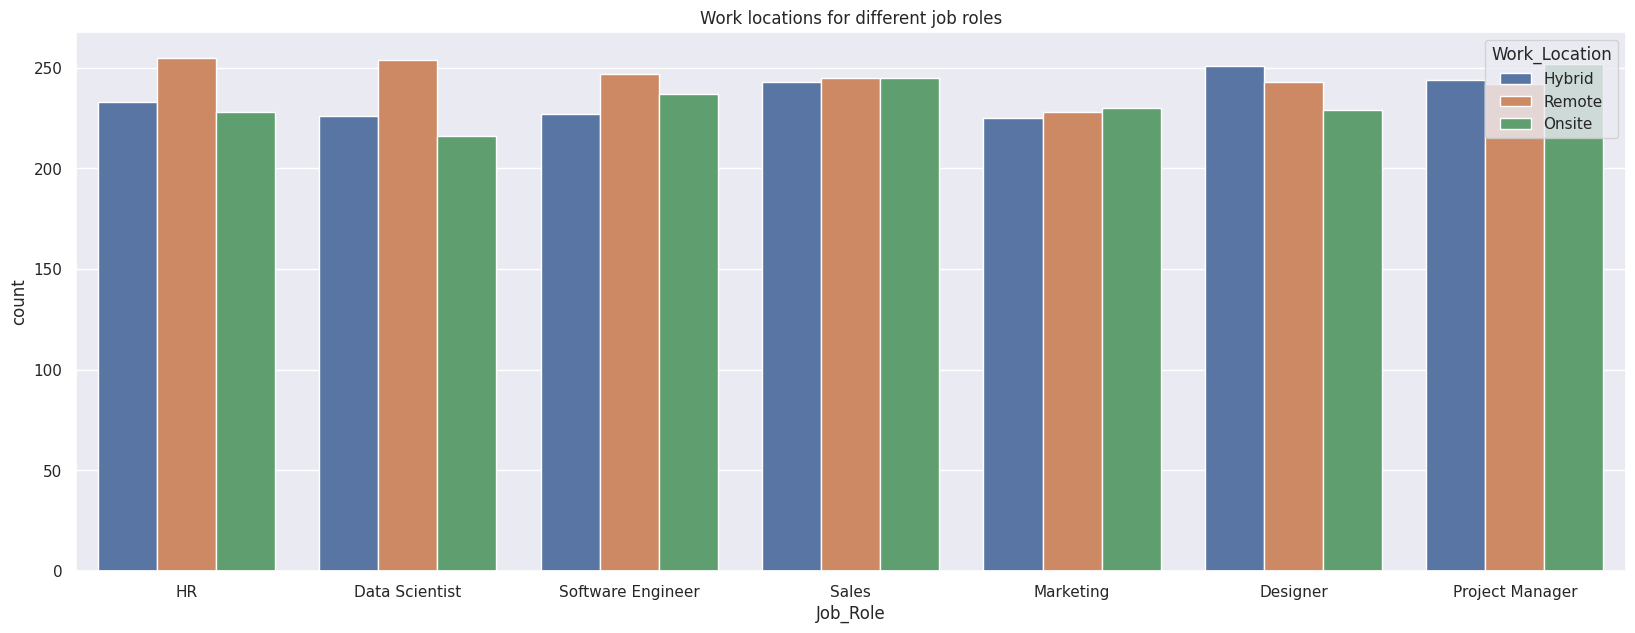

In [16]:
sns.countplot(df, x='Job_Role', hue='Work_Location').set(title='Work locations for different job roles');

## `Hours_Worked_Per_Week`

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


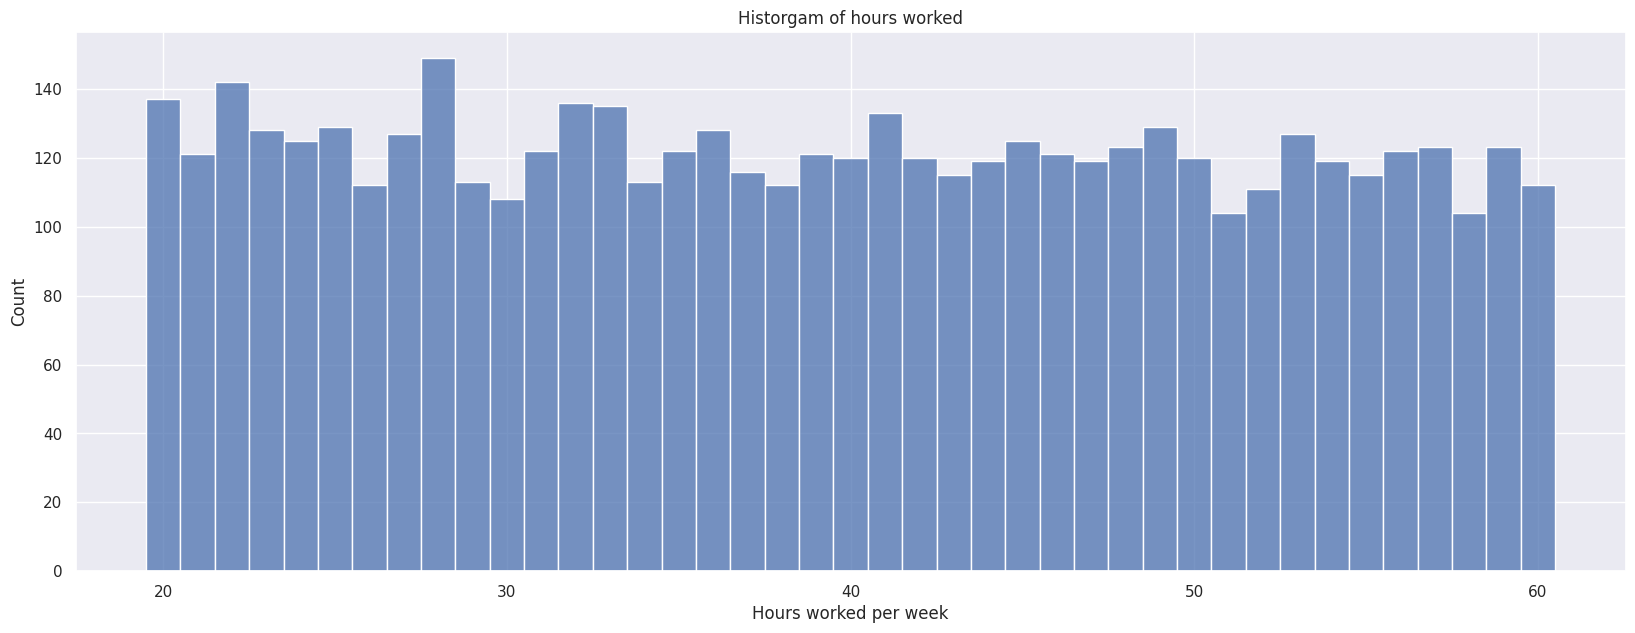

In [17]:
sns.histplot(df, x='Hours_Worked_Per_Week', discrete=True).set(title='Historgam of hours worked', xlabel='Hours worked per week');

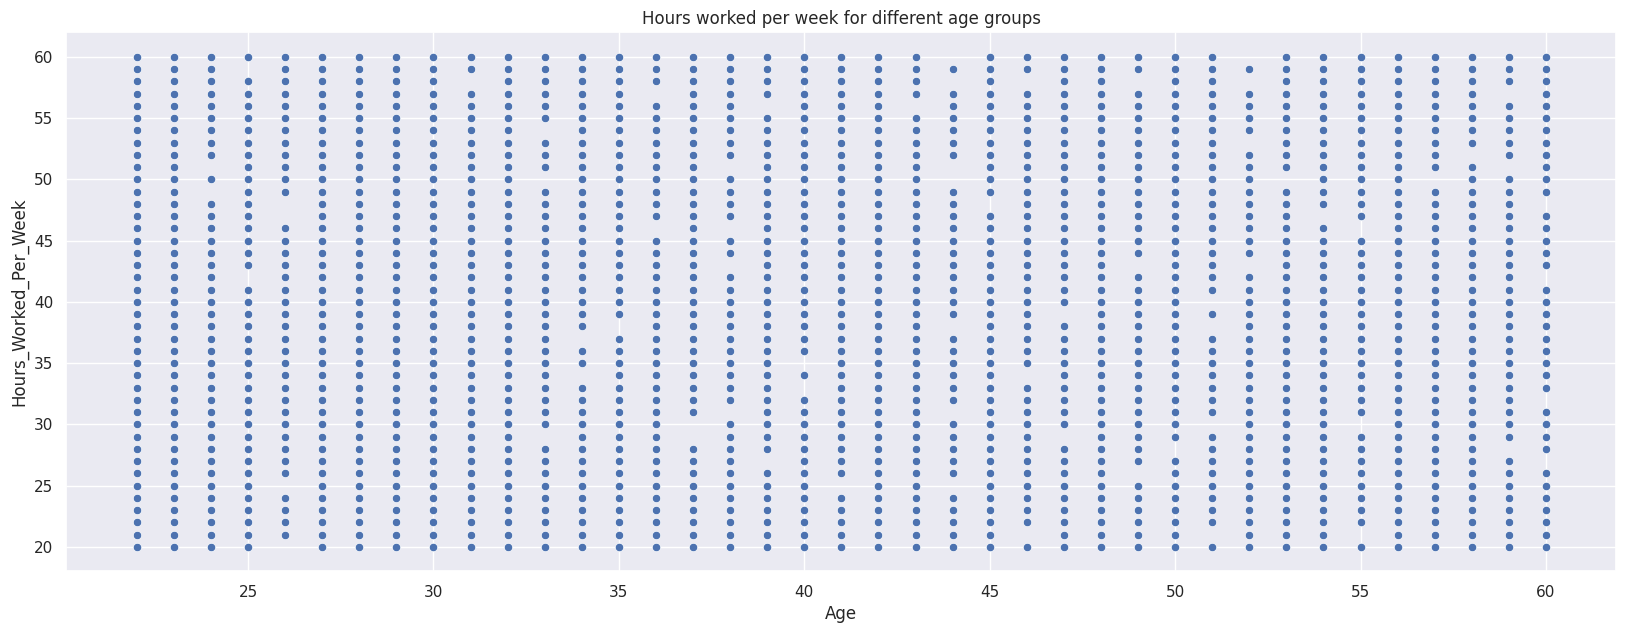

In [18]:
sns.scatterplot(df, x='Age', y='Hours_Worked_Per_Week').set(title='Hours worked per week for different age groups');

## `Number_of_Virtual_Meetings`

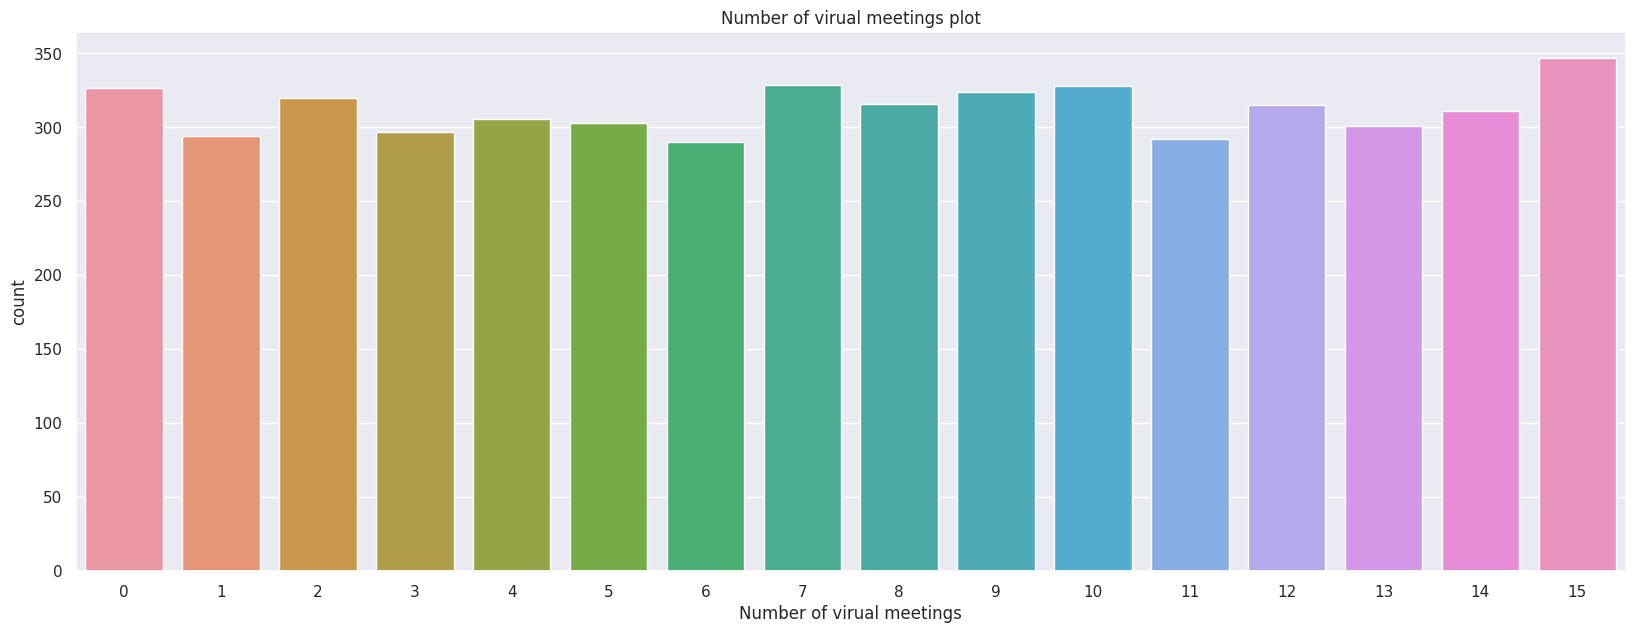

In [19]:
sns.countplot(df, x='Number_of_Virtual_Meetings').set(title='Number of virual meetings plot', xlabel='Number of virual meetings');

# STRESS AND MENTAL HEALTH LEVELS

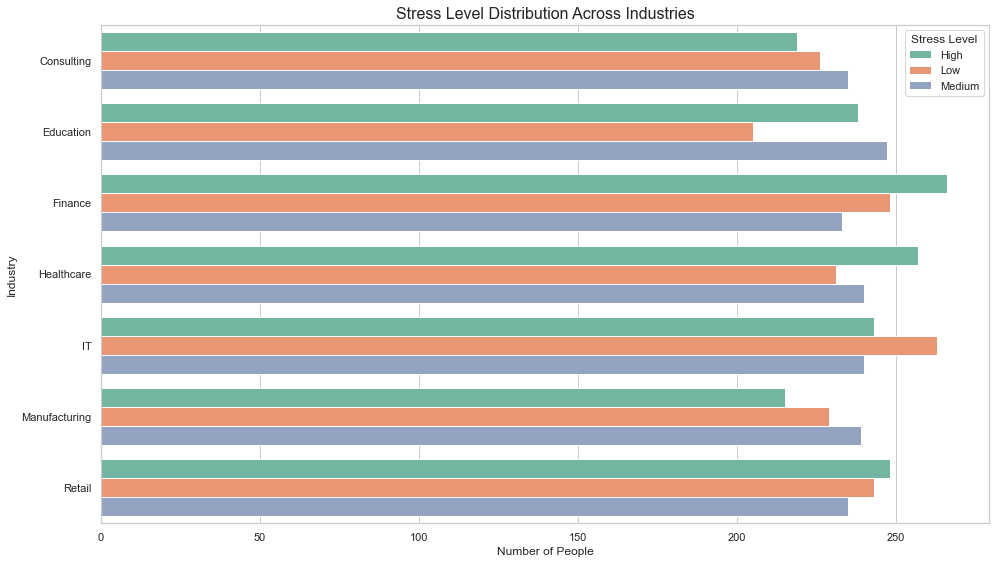

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\anves\Downloads\Impact_of_Remote_Work_on_Mental_Health.csv")

stress_counts_by_industry = df.groupby(['Industry', 'Stress_Level']).size().unstack(fill_value=0)

stress_counts_reset = stress_counts_by_industry.reset_index()

stress_melted = stress_counts_reset.melt(id_vars='Industry', var_name='Stress_Level', value_name='Count')

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

sns.barplot(data=stress_melted, x='Count', y='Industry', hue='Stress_Level', palette='Set2')

plt.title("Stress Level Distribution Across Industries", fontsize=16)
plt.xlabel("Number of People")
plt.ylabel("Industry")
plt.legend(title="Stress Level")
plt.tight_layout()
plt.show()

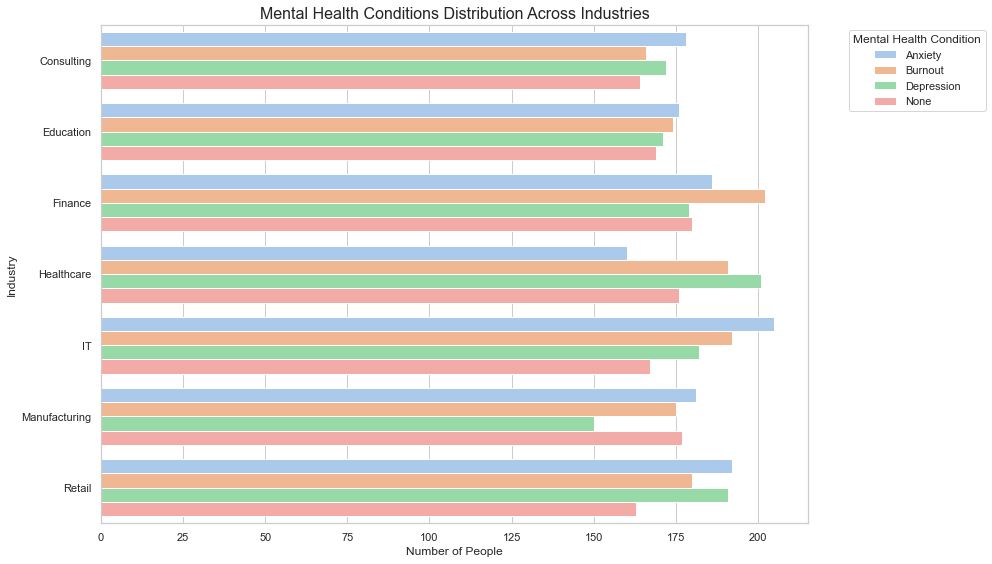

In [2]:
mh_counts_by_industry = df.groupby(['Industry', 'Mental_Health_Condition']).size().unstack(fill_value=0)

mh_counts_reset = mh_counts_by_industry.reset_index()

mh_melted = mh_counts_reset.melt(id_vars='Industry', var_name='Mental_Health_Condition', value_name='Count')

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

sns.barplot(data=mh_melted, x='Count', y='Industry', hue='Mental_Health_Condition', palette='pastel')

plt.title("Mental Health Conditions Distribution Across Industries", fontsize=16)
plt.xlabel("Number of People")
plt.ylabel("Industry")
plt.legend(title="Mental Health Condition", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## correlation between features

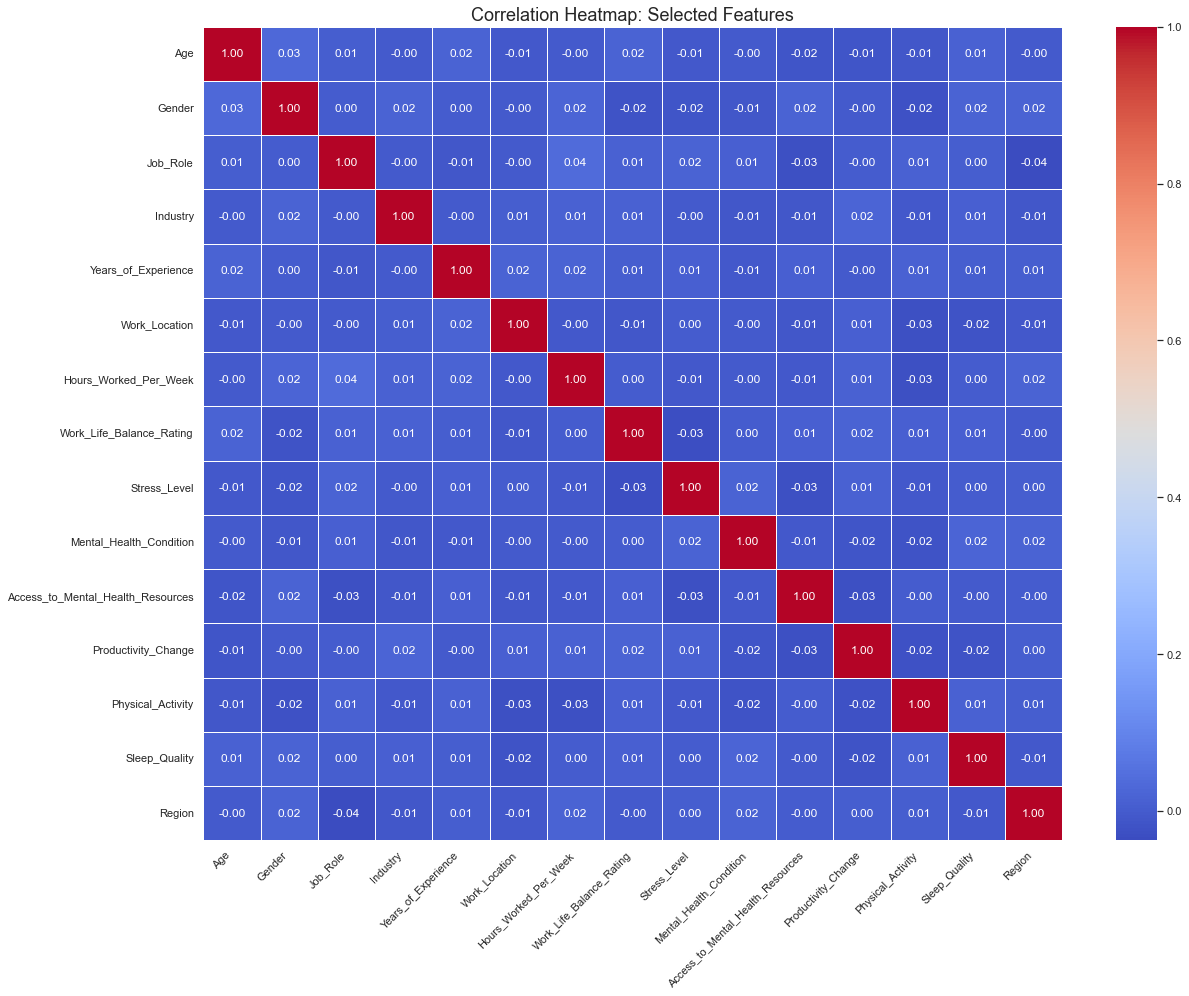

In [4]:


from sklearn.preprocessing import LabelEncoder

# Basic preprocessing
df["Physical_Activity"] = df["Physical_Activity"].fillna("No")
df["Mental_Health_Condition"] = df["Mental_Health_Condition"].fillna("No Depression")
df = df.drop(columns=["Employee_ID", "Timestamp"], errors="ignore")

# Columns you want to include
selected_cols = ['Age', 'Gender', 'Job_Role', 'Industry', 'Years_of_Experience',
                 'Work_Location', 'Hours_Worked_Per_Week', 'Work_Life_Balance_Rating',
                 'Stress_Level', 'Mental_Health_Condition', 'Access_to_Mental_Health_Resources',
                 'Productivity_Change', 'Physical_Activity', 'Sleep_Quality', 'Region']

# Label encode all selected columns
df_selected = df[selected_cols].copy()
le = LabelEncoder()
for col in df_selected.columns:
    df_selected[col] = le.fit_transform(df_selected[col].astype(str))

# Compute and plot correlation heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(df_selected.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap: Selected Features", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()